<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
# Your Code Here
data = pd.read_csv("winequality-red.csv", sep=';')
data.loc[:, 'quality_cat'] = (data.loc[:, 'quality'] > 5).astype(int)
data = data.drop('quality', axis=1)
train, test = train_test_split (data, test_size=0.2)
print train.shape
print test.shape

(1279, 12)
(320, 12)


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [3]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve
    
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

In [4]:
# Your Code Here
opt = 10000
scor = make_scorer (roc_auc_score)
for d in range (1, 10):
    cl = DecisionTreeClassifier (max_depth=d, random_state=24)
    res = np.linalg.norm (cross_val_score (cl, data.drop('quality_cat', axis=1), data['quality_cat'],scoring=scor))
#     if res < opt:
#         opt = res
    print res

1.17962215384
1.1561115995
1.19039055986
1.26218665012
1.2366396107
1.17671278044
1.16231595492
1.16361430812
1.16035572036


In [5]:
# for d in range (1, 100):
cl = DecisionTreeClassifier ()#max_depth=d, random_state=24)
train_scores, test_scores = validation_curve (cl, data.drop('quality_cat', axis=1), data['quality_cat'], 'max_depth', range(1,20), scoring='roc_auc')#, n_jobs=1, cv=5. score='roc_auc_score')
#     validation_curve ()0

In [6]:
test_mean = test_scores.mean (axis = 1)
test_std = test_scores.std (axis = 1)
train_mean = train_scores.mean (axis = 1)
train_std = train_scores.std (axis = 1)

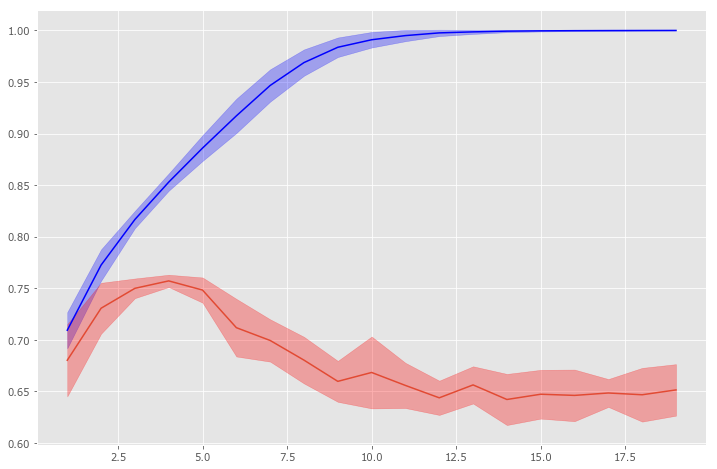

In [7]:
d = range (1,20)
plt.plot (d, train_mean, color='b')
plt.plot (d, test_mean)

plt.fill_between (d, train_mean - train_std, train_mean + train_std,color='b', alpha=0.3)
plt.fill_between (d, test_mean - test_std, test_mean + test_std, color='r', alpha=0.3)

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [8]:
# Your Code Here
cl = DecisionTreeClassifier (max_depth=4, random_state=24)
cl.fit(train.drop('quality_cat', axis=1), train['quality_cat'].values)
fi = cl.feature_importances_
feature_colums = data.columns[data.columns != 'quality_cat']
#print feature_colums
#print fi
sorted_cols = [(x,y) for (y,x) in sorted(zip(fi,feature_colums),reverse=True)]
print sorted_cols

[('alcohol', 0.57394293872666347), ('sulphates', 0.2062463236412912), ('volatile acidity', 0.090770532816882896), ('total sulfur dioxide', 0.090103530358082384), ('chlorides', 0.017667322569902125), ('fixed acidity', 0.012509880801985842), ('pH', 0.0087594710851921376), ('residual sugar', 0.0), ('free sulfur dioxide', 0.0), ('density', 0.0), ('citric acid', 0.0)]


#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

precision:  0.707182320442
recall:  0.739884393064
f1 score:  0.723163841808


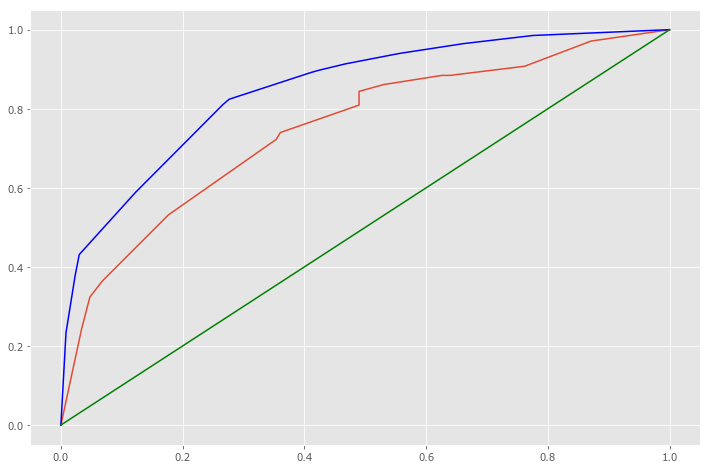

In [9]:
# Your Code Here
from sklearn.metrics import roc_curve
from sklearn import metrics
res_for_test_proba = cl.predict_proba(test.drop('quality_cat', axis=1))
res_for_train_proba = cl.predict_proba(train.drop('quality_cat', axis=1))
res_for_test = cl.predict (test.drop('quality_cat', axis=1))
res_for_train = cl.predict (train.drop('quality_cat', axis=1))
# res_for_test
# print test['quality_cat'].values
test_proba = [y for (x,y) in res_for_test_proba]
train_proba = [y for (x,y) in res_for_train_proba]
fpr_test, tpr_test , thresholds_test= roc_curve(test['quality_cat'], test_proba)
fpr_train, tpr_train , thresholds_train= roc_curve(train['quality_cat'], train_proba)
# roc_test
plt.plot (fpr_test, tpr_test)
plt.plot (fpr_train, tpr_train,color='b')
plt.plot ([0,1], [0,1], color='g')

R = metrics.recall_score (test['quality_cat'].values,res_for_test)
P = metrics.precision_score (test['quality_cat'].values,res_for_test)
print "precision: ",P
print "recall: ",R
F = metrics.f1_score (test['quality_cat'].values,res_for_test)
print "f1 score: ",F

#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
bc_100 = BaggingClassifier (cl, n_estimators=50)
bc_100.fit (train.drop('quality_cat', axis=1), train.quality_cat)
bc_100_proba = bc_100.predict_proba (test.drop ('quality_cat', axis=1))
bc_100_proba_res = [y for (x,y) in bc_100_proba]
fpr_test_100, tpr_test_100 , thresholds_test = roc_curve(test['quality_cat'].values, bc_100_proba_res)

In [12]:
# Your Code Here
bc = BaggingClassifier (cl)
bc.fit (train.drop('quality_cat', axis=1), train.quality_cat)
bc_proba = bc.predict_proba (test.drop ('quality_cat', axis=1))
bc_proba_res = [y for (x,y) in bc_proba]
fpr_test, tpr_test , thresholds_test = roc_curve(test['quality_cat'].values, bc_proba_res)
# plt.plot (fpr_test, tpr_test)
# plt.plot (fpr_test_100, tpr_test_100, color='b')

In [13]:
list_bc = []
for trees in range (10, 101, 10):
    bc_100 = BaggingClassifier (cl, n_estimators=trees)
    bc_100.fit (train.drop('quality_cat', axis=1), train.quality_cat)
    bc_100_res = bc_100.predict (test.drop ('quality_cat', axis=1))
    list_bc.append (metrics.f1_score (test['quality_cat'].values,bc_100_res))

list_rf = []
for trees in range (10, 101, 10):
    rf_100 = RandomForestClassifier (n_estimators=trees)
    rf_100.fit (train.drop('quality_cat', axis=1), train.quality_cat)
    rf_100_res = rf_100.predict (test.drop ('quality_cat', axis=1))
    list_rf.append (metrics.f1_score (test['quality_cat'].values,rf_100_res))


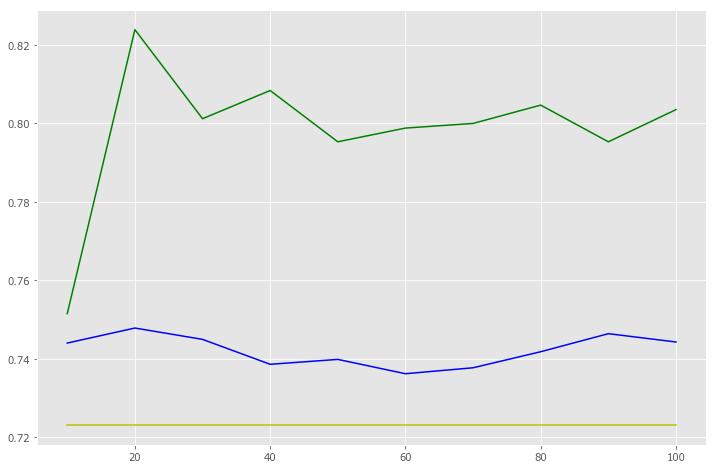

In [14]:
plt.plot (range(10,101, 10), list_bc, color='b')
plt.plot (range(10,101, 10), list_rf, color='g')
plt.plot (range(10,101, 10), [F]*10, color = 'y')


####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [15]:
from scipy.stats import norm
res_norms = norm.rvs(size=100)
res_norms = res_norms - min(res_norms)
res_norms = res_norms / (2 * max(res_norms))

In [16]:
# Your Code Here
from sklearn.model_selection import  RandomizedSearchCV
rf_rs = RandomForestClassifier()
parameters = {'n_estimators':range (1, 120), 'min_samples_leaf':range (1, 20)}#, 'min_samples_split':range (2, 5), 'min_weight_fraction_leaf':res_norms}
rs = RandomizedSearchCV (rf_rs, parameters)
rs.fit (train.drop ('quality_cat',axis=1), train.quality_cat)
res = rs.best_params_
print res

{'n_estimators': 73, 'min_samples_leaf': 1}


In [19]:
super_forest = RandomForestClassifier (n_estimators=73, min_samples_leaf=1)#, min_weight_fraction_leaf=0.16359904774449249, min_samples_leaf=9)
print "with fited params: ", np.linalg.norm(cross_val_score (super_forest, train.drop('quality_cat', axis=1), train.quality_cat,scoring=scor))
forest =  RandomForestClassifier()
print "default forest: ", np.linalg.norm(cross_val_score (forest, train.drop('quality_cat', axis=1), train.quality_cat,scoring=scor))


with fited params:  1.37989116521
default forest:  1.3452540564


In [20]:
super_forest.fit (train.drop('quality_cat', axis=1), train.quality_cat)
super_res_forest = super_forest.predict (test.drop('quality_cat',axis =1))
print "f1 score for fitted params: ", metrics.f1_score (test.quality_cat, super_res_forest)
forest.fit (train.drop('quality_cat', axis=1), train.quality_cat)
res_forest = forest.predict (test.drop('quality_cat',axis =1))
print "f1 score for default params: ", metrics.f1_score (test.quality_cat, res_forest)

f1 score for fitted params:  0.795252225519
f1 score for default params:  0.73125
